# Badanie danych

## Ilość danych

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

df = pd.read_excel('titanic3.xls',sheet_name='dataset')
orig_df = df

In [12]:
df.shape

(1309, 14)

W naszym przykładzie zbiór składa się z 1309 wierszy i 14 kolumn danych.

## Statystyki podsumowujące

In [13]:
df.describe().iloc[:, [0, -1]]

,pclass,body
count,1309.000000,121.000000
mean,2.294882,160.809917
std,0.837836,97.696922
min,1.000000,1.000000
25%,2.000000,72.000000
50%,3.000000,155.000000
75%,3.000000,256.000000
max,3.000000,328.000000


Poniższy kod wyświetla zawartości komórek znajdujących się w drugim i piątym wierszu oraz w trzech ostatnich kolumnach:

In [14]:
df.iloc[[1, 4], -3:]

,boat,body,home.dest
1,11,NaN,"Montreal, PQ / Chesterville, ON"
4,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Atrybut loc pozwala wyświetlać zawartość wierszy i kolumn o podanych
nazwach, a nie indeksach. Poniższy kod prezentuje te same dane co poprzednio:

In [15]:
df.loc[[677, 864], "body":]

,body,home.dest
677,NaN,"Bulgaria Chicago, IL"
864,NaN,NaN


## Histogram

Text(0.5, 1.0, 'Histogram utworzony za pomocą biblioteki pandas')

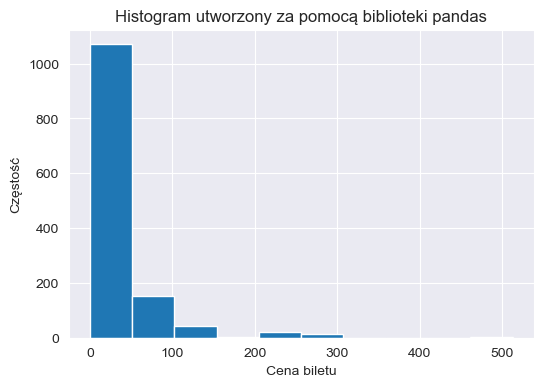

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
df.fare.plot(kind="hist", ax=ax)
ax.set_ylabel("Częstość")
ax.set_xlabel("Cena biletu")
ax.set_title("Histogram utworzony za pomocą biblioteki pandas")

C:\Users\blasz\AppData\Local\Temp\ipykernel_31756\2136230227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.fare,)


Text(0.5, 1.0, 'Histogram utworzony za pomocą biblioteki seaborn')

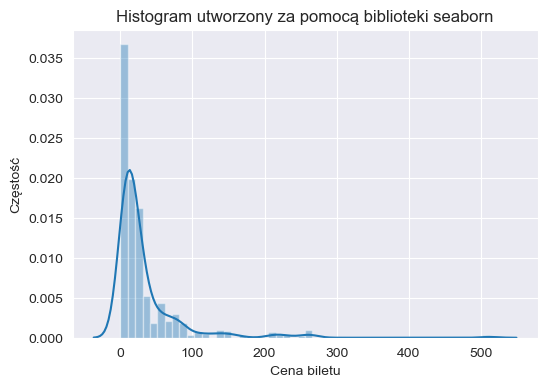

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.distplot(df.fare,)
ax.set_ylabel("Częstość")
ax.set_xlabel("Cena biletu")
ax.set_title("Histogram utworzony za pomocą biblioteki seaborn")

In [18]:
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()
    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(orig_df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

C:\Users\blasz\AppData\Local\Temp\ipykernel_31756\29237824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[mask].fare,  label='przeżyli')
C:\Users\blasz\AppData\Local\Temp\ipykernel_31756\29237824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[~mask].fare, labe

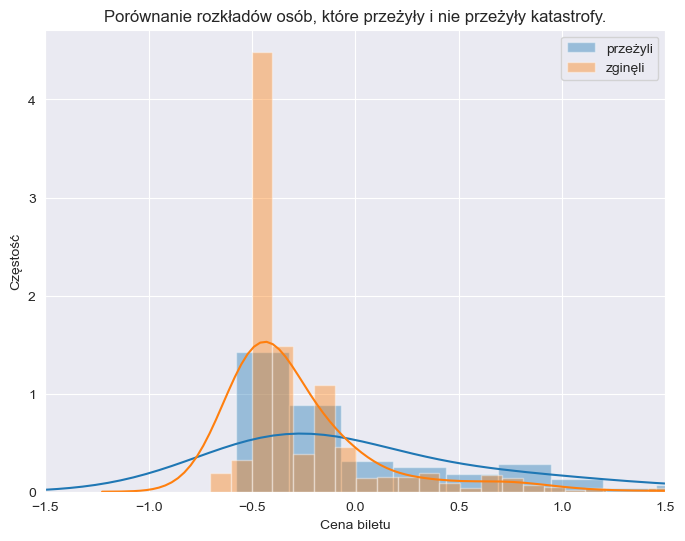

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
mask = y_train == 1
ax = sns.distplot(X_train[mask].fare,  label='przeżyli')
ax = sns.distplot(X_train[~mask].fare, label='zginęli')
ax.set_title("Porównanie rozkładów osób, które przeżyły i nie przeżyły katastrofy.")
ax.set_ylabel("Częstość")
ax.set_xlabel("Cena biletu")
ax.set_xlim(-1.5, 1.5)
ax.legend()

## Wykres punktowy

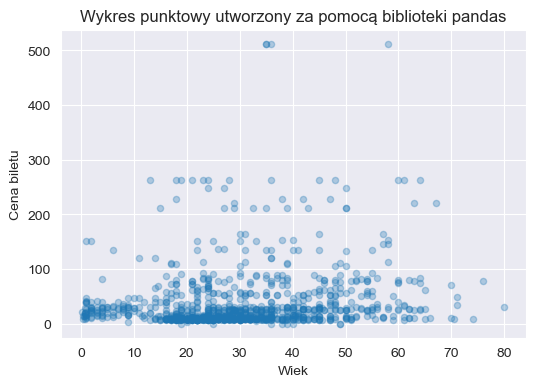

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
df.plot.scatter(
    x="age", y="fare", ax=ax, alpha=0.3
)
plt.xlabel("Wiek")
plt.ylabel("Cena biletu")
plt.title("Wykres punktowy utworzony za pomocą biblioteki pandas")
plt.grid(True)

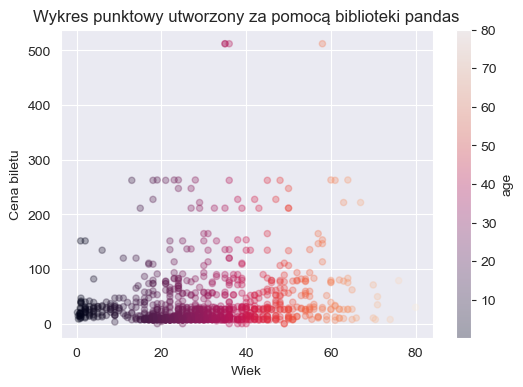

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
# kolorowanie według x
df.plot.scatter(
    x="age", y="fare", ax=ax, alpha=0.3, c="age"
)
plt.xlabel("Wiek")
plt.ylabel("Cena biletu")
plt.title("Wykres punktowy utworzony za pomocą biblioteki pandas")
plt.grid(True)

In [22]:
X.age.corr(X.fare)

0.17719974839989583

In [23]:
df.age.corr(df.fare)

0.1787393231464611

## Wykres łączony

In [24]:
from yellowbrick.features import (
    JointPlotVisualizer,
)

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(
    feature="age", target="fare", correlation='pearson', kind='scatter', hist=True,  alpha=0.65,
)
jpv.fit(X["age"], X["fare"])
jpv.poof()

# correlationstr, default: ‘pearson’: ‘pearson’, ‘covariance’, ‘spearman’, ‘kendalltau’.

# Wykres łączony utworzony za pomocą biblioteki Yellowbrick
# Argumenty X i y metody fit zawierają kolumny danych.
# Zazwyczaj symbolem X oznacza się strukturę DataFrame, a nie serię danych.

In [ ]:
from seaborn import jointplot
new_df = X.copy()
new_df["target"] = y
p = jointplot(
    "age", "fare", data=new_df, kind="reg"
)

## Macierz wykresów

In [ ]:
from seaborn import pairplot
new_df = X.copy()
new_df["target"] = y
vars = ["pclass", "age", "fare"]
p = pairplot(
    new_df, vars=vars, hue="target", kind="reg"
)

## Wykresy pudełkowy i skrzypcowy

In [ ]:
from seaborn import boxplot
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df["target"] = y
boxplot(x="target", y="age", data=new_df)

In [ ]:
from seaborn import violinplot
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df["target"] = y
violinplot(
    x="target", y="sex_male", data=new_df
)

## Porównywanie dwóch cech porządkowych

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
(
    X.assign(
        age_bin=pd.qcut(
            X.age, q=10, labels=False
        ),
        class_bin=pd.cut(
            X.pclass, bins=3, labels=False
        ),
    )
    .groupby(["age_bin", "class_bin"])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(
        stacked=True,
        width=1,
        ax=ax,
        cmap="viridis",
    )
    .legend(bbox_to_anchor=(1, 1))
)

## Korelacja

In [ ]:
from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(
    features=X.columns, algorithm="pearson"
)
pcv.fit(X, y)
pcv.transform(X)
pcv.poof()

In [ ]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(
    X.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)

In [ ]:
X.corr().iloc[:, :2]

In [ ]:
def correlated_columns(df, threshold=0.95):
    return (
        df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns,
            )
        )
        .stack()
        .rename("pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )
correlated_columns(X)

In [ ]:
c_df = correlated_columns(agg_df.select_dtypes('number'))
c_df.style.format({"pearson": "{:.2f}"})

## Wykres RadViz

Wykres RadViz ma postać koła, w którego wnętrzu znajdują się punkty reprezentujące próbki danych, a na obrzeżach cechy.

Wartości są znormalizowane. Można sobie wyobrazić, że każdy punkt jest
połączony za pomocą sprężynek z cechami, do których jest przyciągany. 

Jest to jeden ze sposobów wizualizowania odrębności cech. Wykres można uzyskać za pomocą biblioteki Yellowbrick i następującego kodu:

In [ ]:
from yellowbrick.features import RadViz
fig, ax = plt.subplots(figsize=(6, 6))
rv = RadViz(
    classes=["died", "survived"],
    features=X.columns,
)
rv.fit(X, y)
_ = rv.transform(X)
rv.poof()

In [ ]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(6, 6))
new_df = X.copy()
new_df["target"] = y
radviz(
    new_df, "target", ax=ax, colormap="PiYG"
)

## Wykres współrzędnych równoległych

In [ ]:
from yellowbrick.features import (
    ParallelCoordinates,
)
fig, ax = plt.subplots(figsize=(6, 4))
pc = ParallelCoordinates(
    classes=["died", "survived"],
    features=X.columns,
)
pc.fit(X, y)
pc.transform(X)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)
pc.poof()

In [ ]:
from pandas.plotting import (
    parallel_coordinates,
)
fig, ax = plt.subplots(figsize=(6, 4))
new_df = X.copy()
new_df["target"] = y
parallel_coordinates(
    new_df,
    "target",
    ax=ax,
    colormap="viridis",
    alpha=0.5,
)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)